#House Price - linear regression

1. Idea je vybrat takové features, které se dají z inzerce, katastru, mapy a poptání sousedů zjistit 
   bez prohlídky 
2. Když exploratory analýzy vybere "best features", budeme je hodnotit s ohledem na bod 1 a ty, které nebudou
   vyhovovat budeme eliminovat a vybírat další vhodné
3. Horní limit pro predikci hodnoty nemovitosti je 20 features, raději méně
4. Domácí úkol: Dataset s House Price, který obsahuje ZIP propojit se socioekonomickými daty a teprve z něj dělat
   predikce

##Load data from files downloaded from Kaggle

In [52]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_log_error, root_mean_squared_error
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import shap
import datetime

In [53]:
#%pip install shap

In [54]:
#from google.colab import drive
#drive.mount('/content/drive')

In [55]:
#file_train='/content/drive/MyDrive/Colab Notebooks/Kagle_Competition/House_Price/train.csv'
#file_test='/content/drive/MyDrive/Colab Notebooks/Kagle_Competition/House_Price/test.csv'

file_train='train_California.csv'
file_test='test_California.csv'


In [56]:
train_df = pd.read_csv(file_train) 
test_df = pd.read_csv(file_test) 
df_sub = pd.read_csv('sample_submission_California.csv')

In [57]:
train_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,

In [58]:
#Statistics, Age and LotFrontage is not allways filled - see row count
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [59]:
#Data types
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [60]:
# It's allways necessary to check train data too
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [61]:
# find categorical variables
categorical = [col for col in train_df.columns if train_df[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))
train_df[categorical].head()

There are 43 categorical variables


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,NaN,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,NaN,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [62]:
# find numerical variables
numerical = [col for col in train_df.columns if train_df[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))
train_df[numerical].head()

There are 38 numerical variables


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


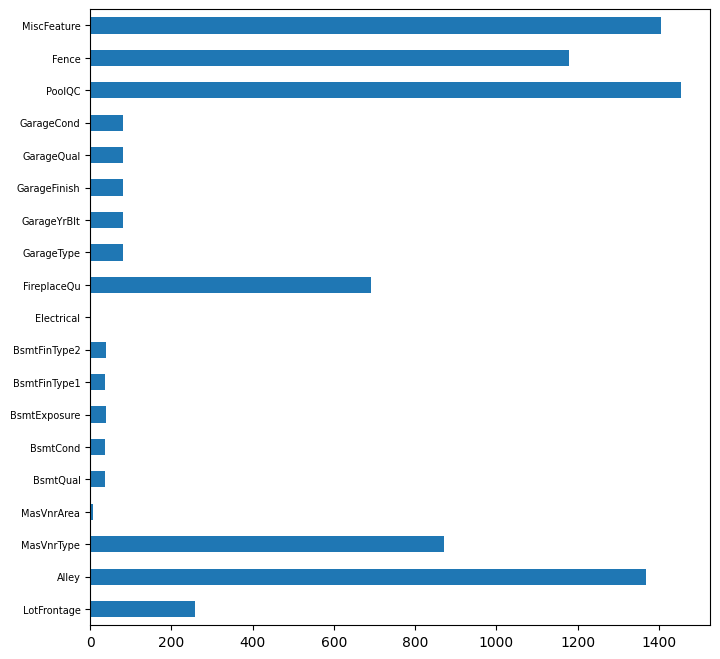

In [63]:
#null values
import matplotlib.pyplot as plt
null_counts = train_df.isnull().sum()
null_counts = null_counts[null_counts > 0]
plt.figure(figsize=(8, 8))
null_counts.plot(kind='barh')
plt.yticks(fontsize=7)
plt.show()

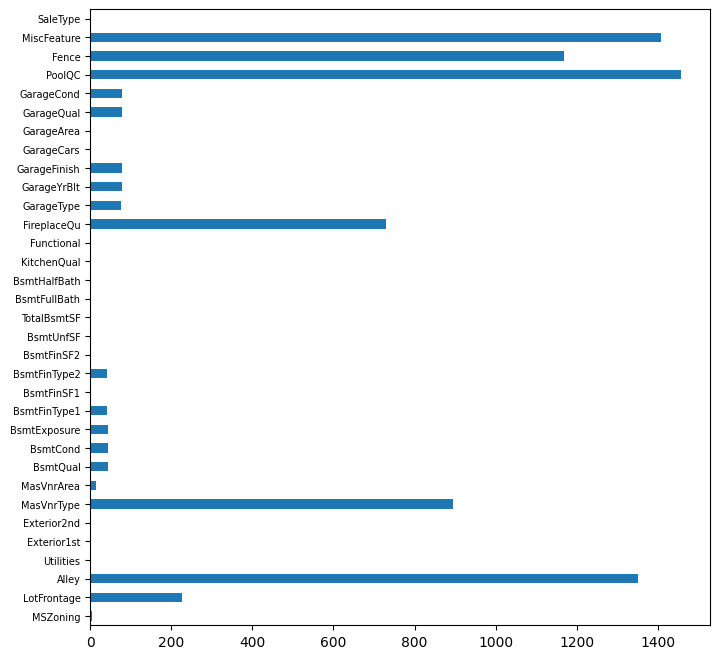

In [64]:
null_counts = test_df.isnull().sum()
null_counts = null_counts[null_counts > 0]
plt.figure(figsize=(8, 8))
null_counts.plot(kind='barh')
plt.yticks(fontsize=7)
plt.show()

In [65]:
train_df["Neighborhood"].unique() 

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [66]:
train_df['MSZoning'].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

In [67]:
train_df["HouseStyle"].unique()

array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)

In [68]:
train_df["Street"].unique()

array(['Pave', 'Grvl'], dtype=object)

In [69]:
train_df["Alley"].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [70]:
train_df['MSSubClass'].value_counts()

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64

In [71]:
train_df.groupby("LotShape")["SalePrice"].mean()

LotShape
IR1    206101.665289
IR2    239833.365854
IR3    216036.500000
Reg    164754.818378
Name: SalePrice, dtype: float64

In [72]:
train_df.nlargest(10, "LotArea")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,Inside,Sev,Timber,Norm,Norm,1Fam,1Story,7,5,1965,1965,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,1236,Rec,820,80,2136,GasW,TA,Y,SBrkr,2036,0,0,2036,2,0,2,0,3,1,TA,8,Typ,2,Gd,Attchd,1965.0,RFn,2,513,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,Corner,Sev,Timber,Norm,Norm,2fmCon,1.5Fin,5,6,1965,1965,Gable,CompShg,Plywood,Plywood,NaN,0.0,TA,TA,CBlock,TA,TA,Gd,ALQ,1249,BLQ,147,103,1499,GasA,Ex,Y,SBrkr,1619,167,0,1786,2,0,2,0,3,1,TA,7,Typ,2,Gd,Attchd,1965.0,Fin,2,529,TA,TA,Y,670,0,0,0,0,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,1958,2006,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472.0,Gd,TA,CBlock,Gd,TA,Gd,Rec,697,Unf,0,747,1444,GasA,Gd,Y,SBrkr,1444,700,0,2144,0,1,2,0,4,1,Gd,7,Typ,2,TA,Attchd,1958.0,Fin,2,389,TA,TA,Y,0,98,0,0,0,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,5,1971,2002,Gable,CompShg,Plywood,Plywood,Stone,351.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,1219,Unf,0,424,1643,GasA,TA,Y,SBrkr,1824,0,0,1824,1,0,2,0,2,1,Gd,5,Typ,2,TA,Attchd,1971.0,Unf,2,739,TA,TA,Y,380,48,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000
451,452,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,Inside,Mod,ClearCr,Norm,Norm,1Fam,1Story,7,5,1975,1975,Gable,WdShngl,Plywood,Plywood,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,655,Unf,0,878,1533,GasA,TA,Y,SBrkr,1533,0,0,1533,1,0,2,0,2,1,Gd,5,Typ,2,TA,Attchd,1975.0,Unf,2,576,TA,TA,Y,200,54,0,0,0,0,NaN,NaN,NaN,0,12,2006,WD,Normal,280000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1396,1397,20,RL,NaN,57200,Pave,NaN,IR1,Bnk,AllPub,Inside,Sev,Timber,Norm,Norm,1Fam,1Story,5,5,1948,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,CBlock,TA,TA,Av,BLQ,353,Rec,334,60,747,GasA,TA,Y,SBrkr,1687,0,0,1687,1,0,1,0,3,1,TA,7,Min1,2,TA,Detchd,1966.0,Unf,2,572,TA,TA,N,0,0,50,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,160000
769,770,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,CulDSac,Mod,StoneBr,Norm,Norm,1Fam,2Story,8,5,2003,2003,Hip,CompShg,CemntBd,Wd Shng,BrkFace,603.0,Ex,TA,PConc,Gd,TA,Gd,ALQ,1416,Unf,0,234,1650,GasA,Ex,Y,SBrkr,1690,1589,0,3279,1,0,3,1,4,1,Ex,12,Mod,1,Gd,BuiltIn,2003.0,Fin,3,841,TA,TA,Y,503,36,0,0,210,0,NaN,NaN,NaN,0,6,2010,WD,Normal,538000
457,458,20,RL,NaN,53227,Pave,NaN,IR1,Low,AllPub,CulDSac,Mod,ClearCr,Norm,Norm,1Fam,1Story,4,6,1954,1994,Flat,Tar&Grv,Plywood,Plywood,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,BLQ,1116,Unf,0,248,1364,GasA,Ex,Y,SBrkr,1663,0,0,1663,1,0,1,0,2,1,Gd,6,Min1,2,Gd,Attchd,1954.0,Fin,2,529,TA,TA,Y,224,137,0,0,0,0,NaN,NaN,NaN,0,3,2008,WD,Normal,256000
384,385,60,RL,NaN,53107,Pave,NaN,IR2,Low,AllPub,Corner,Mod,ClearCr,Feedr,Norm,1Fam,2Story,6,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,G

In [73]:
train_df.groupby("BldgType")["SalePrice"].mean()

BldgType
1Fam      185763.807377
2fmCon    128432.258065
Duplex    133541.076923
Twnhs     135911.627907
TwnhsE    181959.342105
Name: SalePrice, dtype: float64

In [74]:
train_df.groupby("Foundation")["SalePrice"].mean()

Foundation
BrkTil    132291.075342
CBlock    149805.714511
PConc     225230.442040
Slab      107365.625000
Stone     165959.166667
Wood      185666.666667
Name: SalePrice, dtype: float64

In [75]:
train_df.groupby("CentralAir")["SalePrice"].mean()

CentralAir
N    105264.073684
Y    186186.709890
Name: SalePrice, dtype: float64

In [76]:
test_df["KitchenQual"].value_counts()

KitchenQual
TA    757
Gd    565
Ex    105
Fa     31
Name: count, dtype: int64

# Preprocessing

In [77]:
#it is necessary join train and test data to contain same columns after usage of get_dummies function
df_complet = pd.concat([train_df, test_df])
#zresetování indexu
df_complet = df_complet.reset_index(drop=True).reset_index()
print(f'train_df shape   : {train_df.shape}')
print(f'test_df shape    : {test_df.shape}')
print(f'df_complet shape : {df_complet.shape}')

train_df shape   : (1460, 81)
test_df shape    : (1459, 80)
df_complet shape : (2919, 82)


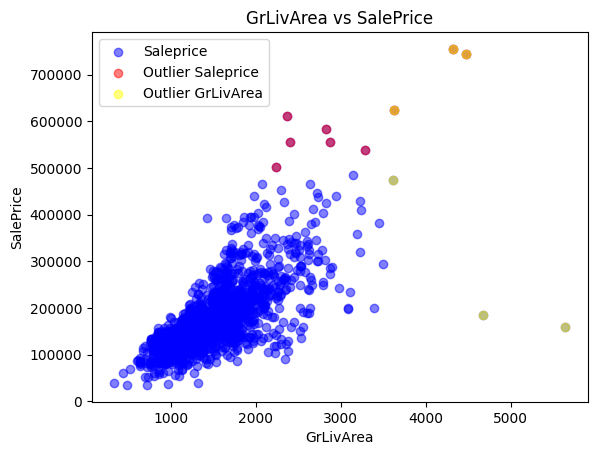

In [78]:
#Plot GrLivArea vs SalePrice https://www.kaggle.com/code/felipefiorini/house-prices-xgboost-outlier-detect
df_oSalePrice = df_complet.query('SalePrice >= 500000')
df_oGrLivAreA = df_complet.query('GrLivArea >= 3500')
plt.scatter(df_complet['GrLivArea'], df_complet['SalePrice'], color='blue', alpha=0.5,label='Saleprice')
plt.scatter(df_oSalePrice['GrLivArea'],   df_oSalePrice['SalePrice'],   color='red',  alpha=0.5, label='Outlier Saleprice')
plt.scatter(df_oGrLivAreA['GrLivArea'],   df_oGrLivAreA['SalePrice'],   color='yellow',  alpha=0.5, label='Outlier GrLivArea')
plt.legend(loc="upper left")
plt.title("GrLivArea vs SalePrice")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

In [79]:
pd.options.mode.copy_on_write = True #warning removal
y = train_df[['Id', 'SalePrice']]
y['Id'] = y['Id'] -1 
y.rename(columns = {'Id':'index'}, inplace = True)
new_submission = test_df[["Id"]] #Id preserved
new_submission.head()

,Id
0,1461
1,1462
2,1463
3,1464
4,1465


In [80]:
# Optional outlier handling
#Outliers
outliers_input = pd.DataFrame()

def outlier_shrink(df):
    df = df.select_dtypes(include='number')
    df = df.fillna(0)
    startcnt = df.shape[0]
    df = df.query('SalePrice < 500000')
    aftercnt = df.shape[0]
    print(f'Row start: {startcnt} end: {aftercnt} decrease by SalePrice: {startcnt - aftercnt}')
    startcnt = aftercnt
    df = df.query('LotFrontage < 200')
    aftercnt = df.shape[0]
    print(f'Row start: {startcnt} end: {aftercnt} decrease by LotFrontage: {startcnt - aftercnt}')
    startcnt = aftercnt
    df = df.query('LotArea < 60000')
    aftercnt = df.shape[0]
    print(f'Row start: {startcnt} end: {aftercnt} decrease by LotArea: {startcnt - aftercnt}')
    startcnt = aftercnt
    df = df.query('MasVnrArea < 1250')
    aftercnt = df.shape[0]
    print(f'Row start: {startcnt} end: {aftercnt} decrease by MasVnrArea: {startcnt - aftercnt}')
    startcnt = aftercnt
    df = df.query('TotalBsmtSF < 2500')
    aftercnt = df.shape[0]
    print(f'Row start: {startcnt} end: {aftercnt} decrease by TotalBsmtSF: {startcnt - aftercnt}')
    startcnt = aftercnt
    df = df.query('YearBuilt > 1880')
    aftercnt = df.shape[0]
    print(f'Row start: {startcnt} end: {aftercnt} decrease by YearBuilt: {startcnt - aftercnt}')
    startcnt = aftercnt
    df = df.query('LowQualFinSF < 300')
    aftercnt = df.shape[0]
    print(f'Row start: {startcnt} end: {aftercnt} decrease by LowQualFinSF: {startcnt - aftercnt}')
    startcnt = aftercnt
    df = df.query('GrLivArea < 3000')
    aftercnt = df.shape[0]
    print(f'Row start: {startcnt} end: {aftercnt} decrease by GrLivArea: {startcnt - aftercnt}')
    startcnt = aftercnt
    df = df.query('GarageArea < 1200')
    aftercnt = df.shape[0]
    print(f'Row start: {startcnt} end: {aftercnt} decrease by GarageArea: {startcnt - aftercnt}')
    startcnt = aftercnt
    df = df.query('PoolArea < 500')
    aftercnt = df.shape[0]
    print(f'Row start: {startcnt} end: {aftercnt} decrease by PoolArea: {startcnt - aftercnt}')
    return (df)

outliers_input = outlier_shrink(train_df)

print("outliers_input shape: ", outliers_input.shape)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

outliers = pd.DataFrame()

def detect_outliers(df):    
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outlier_mask = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))    
    return df[outlier_mask]

# Apply the function to get outliers
numerical = train_df.select_dtypes(include='number').columns
outliers = pd.DataFrame()

for column in numerical:
    outliers[column] = detect_outliers(train_df[column])
    
    fig, ax = plt.subplots(figsize=(2, 3))
    outliers_input[[column]].boxplot(ax=ax)  # Only plot the current column
    plt.xticks(rotation=45)
    plt.ylabel('Values')
    plt.title(f'Boxplot for {column}')
    #plt.show()
    plt.close()
# Display the outliers
#print(outliers)

outliers_input = outliers_input.iloc[:,[0]] #ponecháme jen index pro budoucí merge
outliers_input.rename(columns = {'Id':'index'}, inplace = True) #a přejmenujeme na index


Row start: 1460 end: 1451 decrease by SalePrice: 9
Row start: 1451 end: 1449 decrease by LotFrontage: 2
Row start: 1449 end: 1444 decrease by LotArea: 5
Row start: 1444 end: 1443 decrease by MasVnrArea: 1
Row start: 1443 end: 1438 decrease by TotalBsmtSF: 5
Row start: 1438 end: 1432 decrease by YearBuilt: 6
Row start: 1432 end: 1416 decrease by LowQualFinSF: 16
Row start: 1416 end: 1411 decrease by GrLivArea: 5
Row start: 1411 end: 1407 decrease by GarageArea: 4
Row start: 1407 end: 1403 decrease by PoolArea: 4
outliers_input shape:  (1403, 38)


In [81]:
#one function for train and test
def preproces_data(x):
  x_output = x
  pd.set_option('future.no_silent_downcasting', True)
  for var in ['Id', 'SalePrice']:
    if var in x_output.columns:
      x_output.drop(var, inplace=True, axis =1) #remove Id and Saleprice if exists
  
  x_output['MasVnrArea'] = x_output['MasVnrArea'].fillna(0)
  x_output['BsmtFinSF1'] = x_output['BsmtFinSF1'].fillna(0)
  x_output['BsmtFinSF2'] = x_output['BsmtFinSF2'].fillna(0)
  x_output['BsmtUnfSF'] = x_output['BsmtUnfSF'].fillna(0)
  x_output['TotalBsmtSF'] = x_output['TotalBsmtSF'].fillna(0).astype(float)
  x_output['MSZoning'] = x_output['MSZoning'].fillna('RL')
  x_output['ExterQual'] = x_output['ExterQual'].fillna('TA')
  x_output['HouseStyle'] = x_output['HouseStyle'].fillna('1Story')
  x_output['BsmtCond'] = x_output['BsmtCond'].fillna('Po')
  x_output['KitchenQual'] = x_output['KitchenQual'].fillna('TA')
  x_output['GarageQual'] = x_output['GarageQual'].fillna('NA')
  x_output['Fence'] = x_output['Fence'].fillna('NA')
  x_output['FireplaceQu'] = x_output['FireplaceQu'].fillna('NAN')
  x_output['LotFrontage'] = x_output['LotFrontage'].fillna(0).astype(float) #x_output['LotFrontage'].mean()
  x_output['OpenPorchSF'] = x_output['OpenPorchSF'].fillna(0).astype(float)
  x_output['EnclosedPorch'] = x_output['EnclosedPorch'].fillna(0).astype(float)
  x_output['3SsnPorch'] = x_output['3SsnPorch'].fillna(0).astype(float)
  x_output['ScreenPorch'] = x_output['ScreenPorch'].fillna(0).astype(float)
  x_output['GarageYrBlt'] = x_output['GarageYrBlt'].fillna(0)
  x_output['LotArea'] = x_output['LotArea'].fillna(0)
  x_output['GarageCars'] = x_output['GarageCars'].fillna(0)
  x_output['GarageArea'] = x_output['GarageArea'].fillna(0)
  x_output['BsmtHalfBath'] = x_output['BsmtHalfBath'].fillna(0)
  x_output['RemodAdd'] = 2010 - x_output['YearRemodAdd']
  x_output = x_output.drop(columns=['YearRemodAdd'])
  x_output['Neighborhood'] = x_output['Neighborhood'].str.strip()
  x_output['Crime'] = x_output['Neighborhood'].apply(lambda x: 2 if x in ('NoRidge', 'NridgHt', 'OldTown', 'BrkSide', 'IDOTRR') 
                                                     else 1 if x in ('Blmngtn', 'Blueste', 'CollgCr', 'Edwards', 'MeadowV', 'NPkVill', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst') 
                                                     else 0)
  X_input = x_output
  X_input = x_output.fillna(0)

  x_output = pd.get_dummies(X_input, drop_first = True) #Transform "object" features to feature + value 

  X_input = x_output
  x_output = X_input.fillna(0)
  
  x_output = x_output.replace({True: 1, False: 0}).astype(int) #replace True False to 1, 0 for p.value calculation

  return(x_output)

In [82]:
df_complet["Neighborhood"].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [83]:
#preprocessing function call
X_complet = preproces_data(df_complet)
print(f"df_complet shape: {X_complet.shape}") #+-260 columns

df_complet shape: (2919, 266)


In [84]:
X_complet.columns

Index(['index', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=266)

In [85]:
#data split back to dataframes train and test
train_df = pd.DataFrame()
test_df = pd.DataFrame()
train_df = X_complet.loc[0:1459,:] # insert 0 .. 1459 rows and all cols
test_df = X_complet.loc[1460:,:] # insert 1460 .. 2919 rows and all cols
print(f"train_df shape           : {train_df.shape}")
print(f"test_df shape            : {test_df.shape}")
#cut outliers
X = pd.merge(outliers_input, train_df) #outliers removed based on index
y = pd.merge(outliers_input, y)        #outliers removed based on index
X.reset_index(drop=True).reset_index() #because of missing rows reset index
y.reset_index(drop=True).reset_index() #because of missing rows reset index
y = y.drop(columns=['index'])
print(f"X without outlier        : {X.shape}")
print(f"y                        : {y.shape}")

#nulls
print(f"X NaN                    : {X.isnull().sum().sum()}")
#X.head()

train_df shape           : (1460, 266)
test_df shape            : (1459, 266)
X without outlier        : (1402, 266)
y                        : (1402, 1)
X NaN                    : 0


In [86]:
#columns by p-value
X = sm.add_constant(X)
X.index = y.index
model = sm.OLS(y, X).fit()
p_values = model.pvalues
p_values_df = pd.DataFrame(p_values, columns=['p_value'])
p_values_df = p_values_df.sort_values(by='p_value', ascending=True) #lowest p-value is more significant
print(p_values_df)
#we can use cycle and ad features with lowest p-value and compare mean error for improvement
#other method is to extract features and observe impact to mean error

                            p_value
Condition2_PosN        2.060597e-16
LotArea                1.079017e-12
PoolArea               2.456480e-12
PoolQC_Fa              3.686455e-12
PoolQC_Gd              5.996144e-12
PoolQC_Ex              1.165945e-11
KitchenQual_Gd         3.270650e-10
MiscFeature_TenC       4.924726e-10
ExterCond_Po           7.675280e-10
OverallQual            2.721149e-09
OverallCond            2.759526e-09
GrLivArea              1.032658e-08
KitchenQual_TA         7.195402e-08
BsmtFinSF1             5.668538e-07
2ndFlrSF               2.593652e-06
ExterQual_Gd           3.752033e-06
TotalBsmtSF            9.174161e-06
ExterQual_TA           2.047114e-05
YearBuilt              5.851447e-05
RoofMatl_WdShake       6.205648e-05
RoofMatl_Roll          7.027027e-05
RoofMatl_CompShg       7.166800e-05
RoofMatl_Tar&Grv       7.647541e-05
LandSlope_Sev          1.131080e-04
GarageQual_Fa          1.610093e-04
MasVnrArea             1.715692e-04
RoofMatl_WdShngl       1.811

In [87]:
#there is 266 features, so we should define some border for next processing
p_values_df_sel = p_values_df.query('p_value <= 1').sort_values('p_value') #Select features by p_value, 1 for all
print("Selected: ",p_values_df_sel.shape)
rows_to_retain = p_values_df.index.difference(p_values_df_sel.index)
p_values_df_notsel = p_values_df.loc[list(rows_to_retain)] #Not selected features
print("Not selected: ",p_values_df_notsel.shape)
#display(p_values_df)

Selected:  (267, 1)
Not selected:  (0, 1)


In [88]:
p_values_df_sel.head(10)

,p_value
Condition2_PosN,2.060597e-16
LotArea,1.079017e-12
PoolArea,2.456480e-12
PoolQC_Fa,3.686455e-12
PoolQC_Gd,5.996144e-12
PoolQC_Ex,1.165945e-11
KitchenQual_Gd,3.270650e-10
MiscFeature_TenC,4.924726e-10
ExterCond_Po,7.675280e-10
OverallQual,2.721149e-09


In [89]:
index_values = p_values_df_sel.index.tolist()
p_values_df_sel_col = pd.DataFrame()
p_values_df_sel_col.index = index_values
print(len(p_values_df_sel_col))
selected_features = list(p_values_df_sel_col.index)
print("Selected subset of features for next processing: \n", selected_features)


267
Selected subset of features for next processing: 
 ['Condition2_PosN', 'LotArea', 'PoolArea', 'PoolQC_Fa', 'PoolQC_Gd', 'PoolQC_Ex', 'KitchenQual_Gd', 'MiscFeature_TenC', 'ExterCond_Po', 'OverallQual', 'OverallCond', 'GrLivArea', 'KitchenQual_TA', 'BsmtFinSF1', '2ndFlrSF', 'ExterQual_Gd', 'TotalBsmtSF', 'ExterQual_TA', 'YearBuilt', 'RoofMatl_WdShake', 'RoofMatl_Roll', 'RoofMatl_CompShg', 'RoofMatl_Tar&Grv', 'LandSlope_Sev', 'GarageQual_Fa', 'MasVnrArea', 'RoofMatl_WdShngl', 'Street_Pave', 'RoofMatl_Metal', 'GarageQual_TA', 'RoofMatl_Membran', 'GarageQual_Gd', 'ScreenPorch', 'GarageQual_Po', 'KitchenQual_Fa', 'Neighborhood_Edwards', 'Condition1_Norm', 'RoofStyle_Shed', 'GarageArea', 'WoodDeckSF', 'Neighborhood_StoneBr', 'BsmtCond_Po', 'MSZoning_FV', 'LotConfig_CulDSac', 'SaleCondition_Normal', '1stFlrSF', 'BedroomAbvGr', 'MoSold', 'Condition1_RRAe', 'MSZoning_RL', 'LotConfig_FR2', 'Fireplaces', 'GarageCond_TA', 'GarageCond_Gd', 'MSZoning_RM', 'GarageCond_Po', 'KitchenAbvGr', 'Garage

In [90]:
answer = input("Do you want to process feature selection again = 'Y', otherwise features from previous run will be loaded 'N'")
print(answer)

In [91]:
# Function to evaluate model and get mean squared error
if answer == 'Y':

    columns = []
    def evaluate_model(features):
        X_with_const = sm.add_constant(features)
        model = sm.OLS(y, X_with_const).fit()
        predictions = model.predict(X_with_const)
        mse = mean_squared_error(y, predictions)
        return mse, model.pvalues

    # Initial empty set of features
    selected_features = []
    remaining_features = list(p_values_df_sel_col.index)

    # Track the improvement in model error
    best_mse = float('inf')
    sel_feature_cnt  = 0
    iteration_cnt = 0

    while remaining_features and len(p_values_df_sel_col) > iteration_cnt:        
        p_values_dict = {}
        mse_dict = {}
        iteration_cnt += 1
        # Evaluate each feature not yet selected
        for feature in remaining_features:
            features_to_evaluate = selected_features + [feature]
            mse, p_values = evaluate_model(X[features_to_evaluate])
            p_values_dict[feature] = p_values
            mse_dict[feature] = mse

        # Select the feature that gives the best improvement in MSE
        best_feature = min(mse_dict, key=mse_dict.get)
        best_feature_mse = mse_dict[best_feature]

        # Check if the new model is better
        if best_feature_mse < best_mse:
            best_mse = best_feature_mse
            selected_features.append(best_feature)
            sel_feature_cnt += 1
            remaining_features.remove(best_feature)
            print(f"best_feature append: {best_feature}  ME: {np.sqrt(best_feature_mse)} Selected feature count: {sel_feature_cnt}")        
        else:
            # If no improvement, break the loop
            #break
            pass

    # Final model with selected features
    final_mse, final_p_values = evaluate_model(X[selected_features])
    final_p_values_df = pd.DataFrame(final_p_values, columns=['p-value'])

    # Open a file in write binary mode
    with open('my_final_project_p_values_df.pkl', 'wb') as f:
        final_p_values_df = final_p_values_df.drop(index='const')
        pickle.dump(final_p_values_df, f)

    # Display the final p-values and selected features
    print(f"Selected features: {selected_features}")
    print(f"Final model ME: {np.sqrt(best_mse)}")

else:
  with open('my_final_project_p_values_df.pkl', 'rb') as f:
    final_p_values_df = pd.DataFrame(pickle.load(f))    

print(final_p_values_df.head(10))


                      p-value
OverallQual      2.721149e-09
GrLivArea        3.083343e-24
BsmtQual_Ex      2.354703e-01
BsmtFinSF1       3.135762e-01
GarageCars       8.541348e-02
PoolQC_Gd        5.996145e-12
MSSubClass       5.979126e-01
Condition2_PosN  2.060597e-16
BsmtExposure_No  7.526344e-01
ExterQual_TA     2.047114e-05


In [92]:
X = X.drop(columns=['const']) #remove column const to have same features
selected_features = final_p_values_df.index.tolist()

In [93]:
#selected subset of columns, when previous code run for all 266 colls 17 minutes locally ME is 20196
#but no signifficant improvement after 236 feature, but more features means propensity to overfitting
col_sel = selected_features[:236]
col_sel_limited = selected_features[:100]
#columns removal
X_restricted = pd.DataFrame()
X_restricted = X[col_sel]
#X_restricted = X
X = X_restricted
#X_restricted = X_kaggle
X_restricted.shape
test_df = X_restricted
print(X.shape)
print(test_df.shape)
print(X_restricted.shape)
print(len(col_sel_limited))

(1402, 236)
(1402, 236)
(1402, 236)
100


In [94]:
X[col_sel_limited].head(10)

,OverallQual,GrLivArea,BsmtQual_Ex,BsmtFinSF1,GarageCars,PoolQC_Gd,MSSubClass,Condition2_PosN,BsmtExposure_No,ExterQual_TA,Neighborhood_NridgHt,Neighborhood_NoRidge,Neighborhood_StoneBr,OverallCond,YearBuilt,LotArea,RoofMatl_WdShngl,Neighborhood_Crawfor,ExterQual_Gd,PoolArea,PoolQC_Fa,PoolQC_Ex,SaleType_New,MiscFeature_TenC,BsmtExposure_Gd,TotalBsmtSF,Neighborhood_Somerst,BldgType_Duplex,Functional_Typ,ExterQual_Fa,Exterior1st_BrkFace,Condition1_Norm,SaleCondition_Normal,BedroomAbvGr,Neighborhood_BrkSide,Street_Pave,ScreenPorch,GarageQual_NA,TotRmsAbvGrd,LowQualFinSF,GarageArea,Functional_Sev,LandContour_Low,LotConfig_CulDSac,Neighborhood_Mitchel,KitchenQual_Gd,KitchenQual_TA,KitchenQual_Fa,SaleType_CWD,MasVnrArea,MasVnrType_BrkFace,WoodDeckSF,RoofMatl_Membran,LandSlope_Sev,Foundation_PConc,Fireplaces,FireplaceQu_NAN,KitchenAbvGr,BldgType_2fmCon,Neighborhood_Edwards,Heating_OthW,BsmtFullBath,Condition2_PosA,Neighborhood_NAmes,Neighborhood_NWAmes,Condition1_RRAe,MSZoning_RL,MasVnrType_BrkCmn,Exterior1st_Stucco,SaleType_Con,Foundation_Wood,RemodAdd,Exterior2nd_Plywood,MSZoning_FV,Utilities_NoSeWa,BsmtQual_Gd,MoSold,SaleType_ConLD,3SsnPorch,Exterior1st_HdBoard,GarageFinish_RFn,LandSlope_Mod,RoofStyle_Mansard,BsmtFinType2_ALQ,BsmtCond_Po,BsmtCond_TA,1stFlrSF,Functional_Min2,GarageType_2Types,Neighborhood_SawyerW,FullBath,RoofStyle_Shed,Condition2_RRAe,RoofMatl_Metal,BsmtFinType1_GLQ,BsmtExposure_Av,BsmtExposure_Mn,GarageCond_TA,HouseStyle_1.5Unf,Exterior2nd_Other
0,6,1262,0,978,2,0,20,0,0,1,0,0,0,8,1976,9600,0,0,0,0,0,0,0,0,1,1262,0,0,1,0,0,0,1,3,0,1,0,0,6,0,460,0,0,0,0,0,1,0,0,0,0,298,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,34,0,0,0,1,5,0,0,0,1,0,0,0,0,1,1262,0,0,0,2,0,0,0,0,0,0,1,0,0
1,7,1786,0,486,2,0,60,0,0,0,0,0,0,5,2001,11250,0,0,1,0,0,0,0,0,0,920,0,0,1,0,0,1,1,3,0,1,0,0,6,0,608,0,0,0,0,1,0,0,0,162,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,8,0,0,0,1,9,0,0,0,1,0,0,0,0,1,920,0,0,0,2,0,0,0,1,0,1,1,0,0
2,7,1717,0,216,3,0,70,0,1,1,0,0,0,5,1915,9550,0,1,0,0,0,0,0,0,0,756,0,0,1,0,0,1,0,3,0,1,0,0,7,0,642,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,40,0,0,0,0,2,0,0,0,0,0,0,0,0,0,961,0,0,0,1,0,0,0,0,0,0,1,0,0
3,8,2198,0,655,3,0,60,0,0,0,0,1,0,5,2000,14260,0,0,1,0,0,0,0,0,0,1145,0,0,1,0,0,1,1,4,0,1,0,0,9,0,836,0,0,0,0,1,0,0,0,350,1,192,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,10,0,0,0,1,12,0,0,0,1,0,0,0,0,1,1145,0,0,0,2,0,0,0,1,1,0,1,0,0
4,5,1362,0,732,2,0,50,0,1,1,0,0,0,5,1993,14115,0,0,0,0,0,0,0,0,0,796,0,0,1,0,0,1,1,1,0,1,0,0,5,0,480,0,0,0,1,0,1,0,0,0,0,40,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,15,0,0,0,1,10,0,320,0,0,0,0,0,0,1,796,0,0,0,1,0,0,0,1,0,0,1,0,0
5,8,1694,1,1369,2,0,20,0,0,0,0,0,0,5,2004,10084,0,0,1,0,0,0,0,0,0,1686,1,0,1,0,0,1,1,3,0,1,0,0,7,0,636,0,0,0,0,1,0,0,0,186,0,255,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,5,0,0,0,0,8,0,0,0,1,0,0,0,0,1,1694,0,0,0,2,0,0,0,1,1,0,1,0,0
6,7,2090,0,859,2,0,60,0,0,1,0,0,0,6,1973,10382,0,0,0,0,0,0,0,0,0,1107,0,0,1,0,0,0,1,3,0,1,0,0,7,0,484,0,0,0,0,0,1,0,0,240,0,235,0,0,0,2,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,37,0,0,0,1,11,0,0,1,1,0,0,0,0,1,1107,0,0,0,2,0,0,0,0,0,1,1,0,0
7,7,1774,0,0,2,0,50,0,1,1,0,0,0,5,1931,6120,0,0,0,0,0,0,0,0,0,952,0,0,0,0,1,0,0,2,0,1,0,0,8,0,468,0,0,0,0,0,1,0,0,0,0,90,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,60,0,0,0,0,4,0,0,0,0,0,0,0,0,1,1022,0,0,0,2,0,0,0,0,0,0,1,0,0
8,5,1077,0,851,1,0,190,0,1,1,0,0,0,6,1939,7420,0,0,0,0,0,0,0,0,0,991,0,0,1,0,0,0,1,2,1,1,0,0,5,0,205,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,2,1,0,0,1,0,0,0,0,1,0,0,0,0,60,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1077,0,0,0,1,0,0,0,1,0,0,1,1,0
9,5,1040,0,906,1,0,20,0,1,1,0,0,0,5,1965,11200,0,0,0,0,0,0,0,0,0,1040,0,0,1,0,0,1,1,3,0,1,0,0,5,0,384,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,45,0,0,0,0,2,0,0,1,0,0,0,0,0,1,1040,0,0,0,1,0,0,0,0,0,0,1,0,0


In [95]:
# Initialize variables to store the minimum MSE and the best number of features
min_me = float('inf')
min_train_score = float('inf')
min_test_score = float('inf')
best_num_features = 0
best_model = None

# Loop through each subset size from 1 to the length of col_sel_limited
for i in range(1, len(col_sel_limited) + 1):
    # Select the first i features
    selected_features = col_sel_limited[:i]
    
    # Split the dataset into training and testing sets with the selected features
    X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.25, random_state=42)
    
    # Initialize and fit the linear regression model
    regr = linear_model.LinearRegression()
    regr.fit(X_train, y_train)
    
    # Predict the target variable for the test set
    y_pred = regr.predict(X_test)
    
    # Calculate the Mean Squared Error (MSE) for the current model
    me = root_mean_squared_error(y_pred, y_test)
    
    # Check if this is the best MSE and update the variables accordingly
    if me < min_me:
        min_me = me
        best_num_features = i
        min_train_score = round(regr.score(X_train, y_train), 5)
        min_test_score = round(regr.score(X_test, y_test), 5)
        best_model = regr
        col_sel_best = selected_features
    
    # Print the results for each iteration
    #print(f"Number of Features: {i} ME: {me}")
    
# Output the best result
print(f"Best ME: {min_me} with {best_num_features} features.")
print("Best model Train Score:             ", min_train_score)
print("Best model Test Score:              ", min_test_score)
#print(f"Best Model Coefficients: {best_model.coef_}")

Best ME: 42154.887883551324 with 16 features.
Best model Train Score:              0.87164
Best model Test Score:               0.76059


In [96]:
#Normalize
x = X[col_sel_limited].values #returns a numpy array
scaler = preprocessing.StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
X_norm = pd.DataFrame(x_scaled, columns=col_sel_limited)
#Split data to test and train
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm[selected_features], y, test_size = .25, random_state = 42)

regr_norm = linear_model.LinearRegression() # Do not use fit_intercept = False if you have removed 1 column after dummy encoding

regr_norm.fit(X_train_norm, y_train_norm)

y_pred_norm = regr_norm.predict(X_test_norm)

me = root_mean_squared_error(y_pred_norm, y_test_norm)
    
# Output the best result
print(f"ME: {me} with {best_num_features} features.")
print("Best model Train Score:             ", round(regr_norm.score(X_train_norm, y_train_norm), 5))
print("Best model Test Score:              ", round(regr_norm.score(X_test_norm, y_test_norm), 5))
#print(f"Best Model Coefficients: {best_model.coef_}")

ME: 3886174518926333.0 with 16 features.
Best model Train Score:              0.92925
Best model Test Score:               -2.034655385143465e+21


In [97]:
col_sel_limited[:25]

['OverallQual',
 'GrLivArea',
 'BsmtQual_Ex',
 'BsmtFinSF1',
 'GarageCars',
 'PoolQC_Gd',
 'MSSubClass',
 'Condition2_PosN',
 'BsmtExposure_No',
 'ExterQual_TA',
 'Neighborhood_NridgHt',
 'Neighborhood_NoRidge',
 'Neighborhood_StoneBr',
 'OverallCond',
 'YearBuilt',
 'LotArea',
 'RoofMatl_WdShngl',
 'Neighborhood_Crawfor',
 'ExterQual_Gd',
 'PoolArea',
 'PoolQC_Fa',
 'PoolQC_Ex',
 'SaleType_New',
 'MiscFeature_TenC',
 'BsmtExposure_Gd']

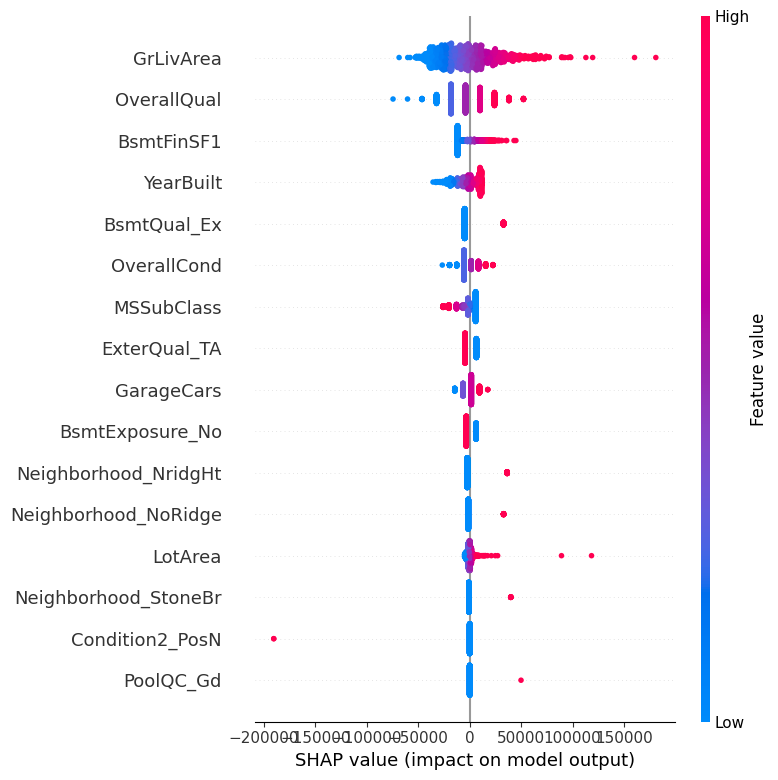

In [98]:
#https://medium.com/defactoblog/explainability-of-the-features-no-of-the-hyperparameters-ad797918155f
#shap.initjs()

# Initialize SHAP explainer
explainer = shap.Explainer(best_model, X_train[col_sel_best])

# Calculate SHAP values
shap_values = explainer(X_train[col_sel_best])

shap.summary_plot(shap_values, X_train[col_sel_best])

In [1168]:
#based on shap graph we should remove these features, but after test, ME is higher than for 16 features, 
#so I continue with 16 features
#col_sel_best.remove('MSSubClass')
#col_sel_best.remove('BsmtExposure_No')
#col_sel_best.remove('Condition2_PosN')

# Extract SHAP values and base values
#shap_values_array = shap_values.values  # Get the SHAP values as an array
#X_train_values = X_train[col_sel_best]

# Loop through each feature to plot one by one
#for feature in col_sel_best:
    #shap.dependence_plot(
        #ind=feature,                     # Pass the feature name
        #shap_values=shap_values_array,   # Use the extracted SHAP values
        #features=X_train_values,         # The dataset used to compute SHAP values
        #feature_names=col_sel_best       # Feature names to match SHAP values
    #)

In [1169]:
# Split the dataset into training and testing sets with the selected features
X_train, X_test, y_train, y_test = train_test_split(X[col_sel_best], y, test_size=0.25, random_state=42)
    
# Initialize and fit the linear regression model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
    
# Predict the target variable for the test set
y_pred = regr.predict(X_test)
    
# Calculate the Mean Squared Error (MSE) for the current model
me = root_mean_squared_error(y_pred, y_test)

print(f"Best ME: {me} with {len(col_sel_best)} features.")
print("Best model Train Score:             ", min_train_score)
print("Best model Test Score:              ", min_test_score)

Best ME: 42154.887883551324 with 16 features.
Best model Train Score:              0.87164
Best model Test Score:               0.76059


In [1170]:
#Normalize - no change in prediction accurracy
x = X[col_sel_best].values #returns a numpy array
scaler = preprocessing.StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
X_norm = pd.DataFrame(x_scaled)
#Split data to test and train
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y, test_size = .25, random_state = 42)

regr_norm = linear_model.LinearRegression() # Do not use fit_intercept = False if you have removed 1 column after dummy encoding

regr_norm.fit(X_train_norm, y_train_norm)

y_pred_norm = regr_norm.predict(X_test_norm)

me = root_mean_squared_error(y_pred_norm, y_test_norm)
    
# Output the best result
print(f"ME: {me} with {best_num_features} features.")
print("Best model Train Score:             ", round(regr_norm.score(X_train_norm, y_train_norm), 5))
print("Best model Test Score:              ", round(regr_norm.score(X_test_norm, y_test_norm), 5))


ME: 42154.887883553725 with 16 features.
Best model Train Score:              0.87164
Best model Test Score:               0.76059


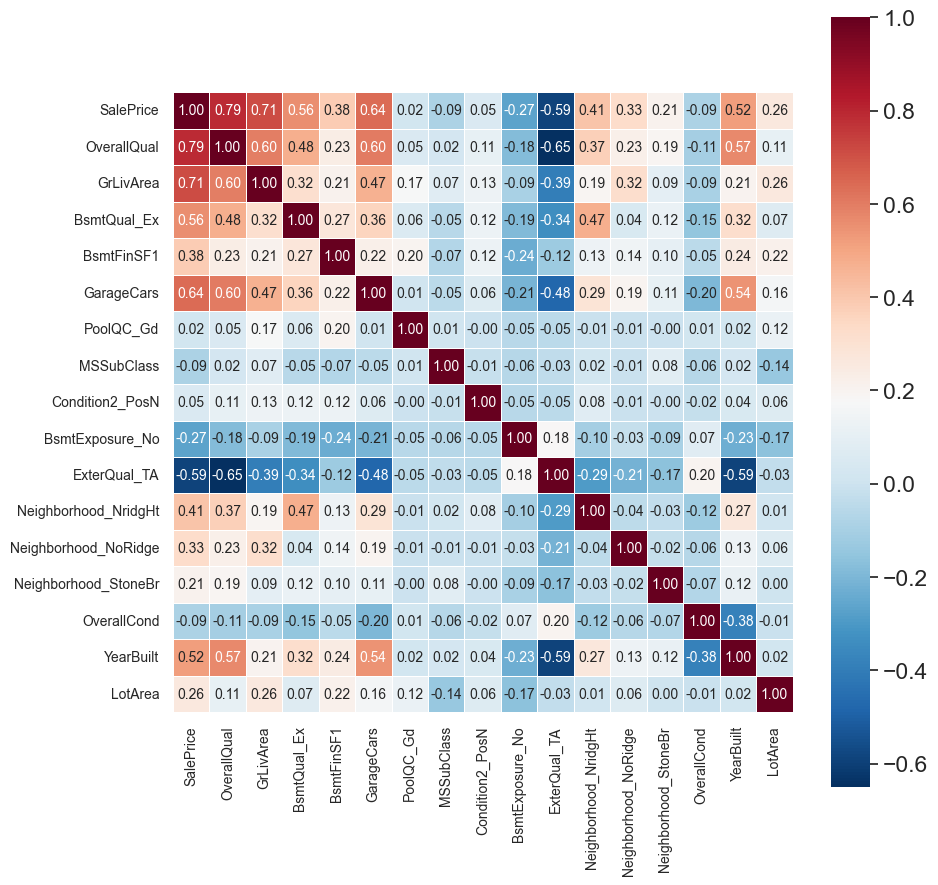

In [1171]:
fig, ax = plt.subplots(figsize=(10,10)) #figsize in inches
X_for_correl= pd.concat([y, X[col_sel_best]], axis = 1)
cm = np.corrcoef(X_for_correl.values.T)
sns.set(style='whitegrid', context='notebook')
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cmap="RdBu_r",
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 linewidths = 0.6,
                 annot_kws={'size': 10},
                 yticklabels=X_for_correl.columns.tolist(),
                 xticklabels=X_for_correl.columns.tolist(),)

# Adjust the font size of the x-axis and y-axis categories
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)

sns.set(font_scale=1)
# Next line is here in order to fix the bug
#ax.set_ylim(len(X_for_correl), 0) # https://github.com/matplotlib/matplotlib/issues/14751

plt.show()

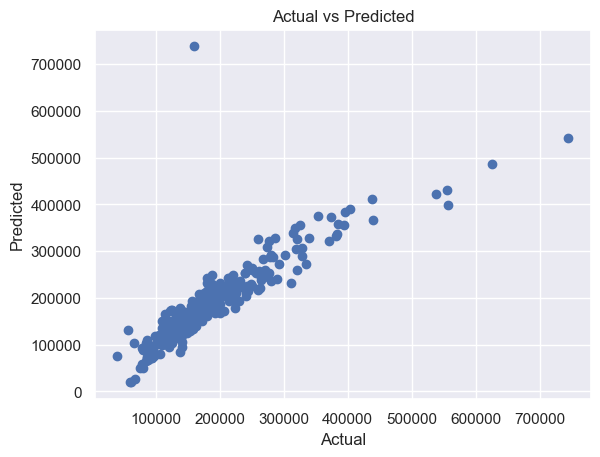

In [1172]:
# 5. Visualize
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

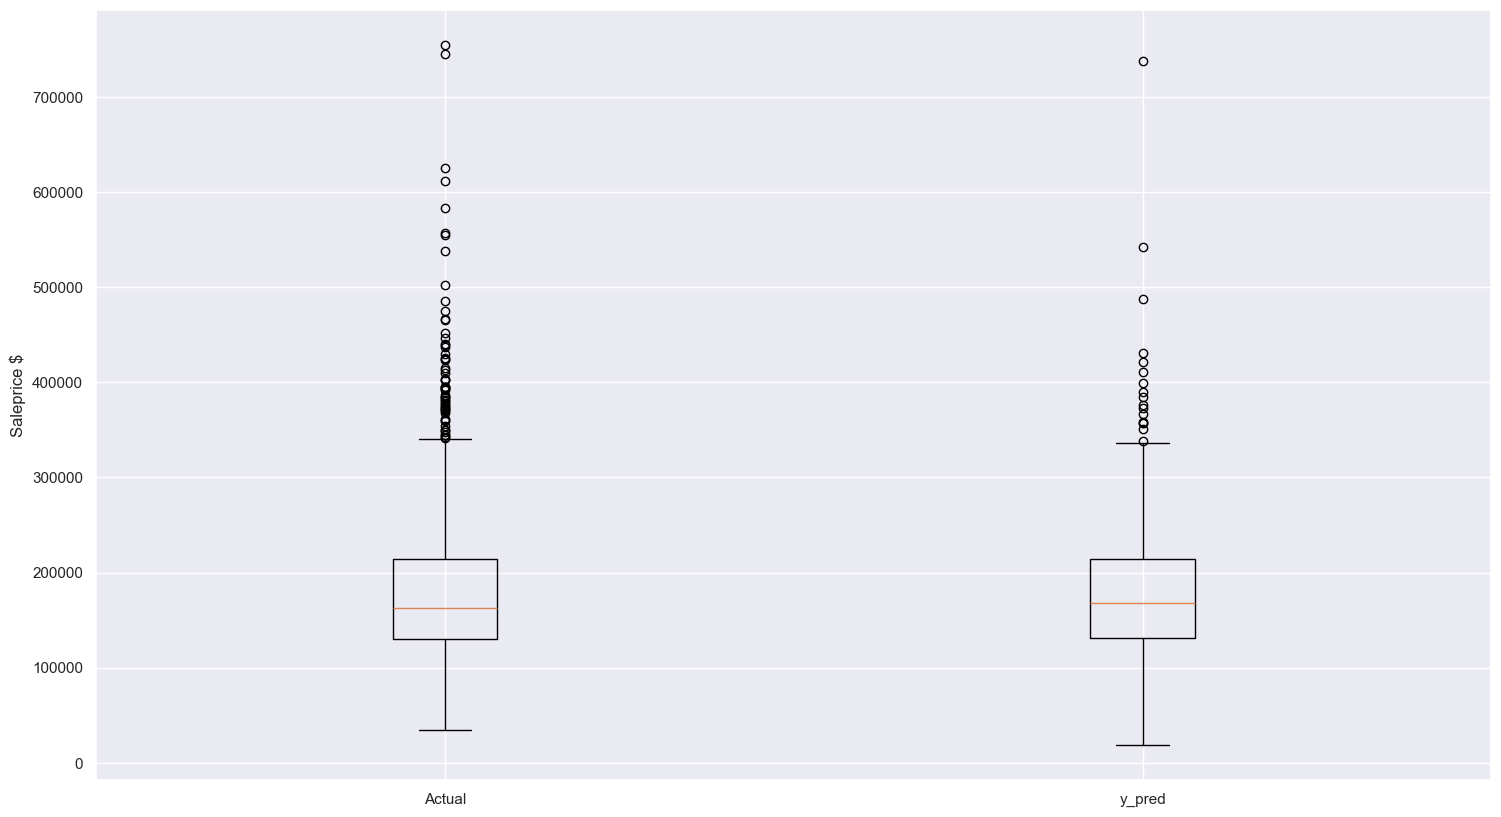

In [1231]:
fig, ax = plt.subplots(figsize=(18, 10))
ax.boxplot([y['SalePrice'].to_numpy(), np.array(y_pred).flatten()])
ax.set_xticklabels(['Actual', 'y_pred'])
ax.set_ylabel('Saleprice $')
plt.show()

In [1173]:
print("Maximum difference in prediction:", np.max(y_test - y_pred))

Maximum difference in prediction: 202610.73598578712


In [1174]:
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("Y_train: ", y_train.shape)
print("Y_test: ", y_test.shape)

X_train:  (1051, 16)
X_test:  (351, 16)
Y_train:  (1051, 1)
Y_test:  (351, 1)


### Lazy classification for further best model selection nad hyperparameter tunning

In [1175]:
#%pip install lazypredict

In [1120]:
#https://medium.com/omics-diary/how-to-use-the-lazy-predict-library-to-select-the-best-machine-learning-model-65378bf4568e
from lazypredict.Supervised import LazyRegressor
import sys
import contextlib

reg = LazyRegressor(verbose=0, 
                    ignore_warnings=False, 
                    custom_metric=None,
                    predictions=False,
                    random_state = 42)

# Initialize LazyClassifier with the custom metric
# Redirect standard output temporarily to suppress prints
with open('nul', 'w') as f, contextlib.redirect_stdout(f):
    models, predictions = reg.fit(X_train, X_test, y_train, y_test)
    model_dictionary = reg.provide_models(X_train, X_test, y_train, y_test)

# Print results
print(models)


100%|██████████| 42/42 [00:03<00:00, 13.92it/s]

                                        Adjusted R-Squared  \
Model                                                        
XGBRegressor                                          0.89   
GradientBoostingRegressor                             0.88   
ExtraTreesRegressor                                   0.85   
RandomForestRegressor                                 0.85   
HistGradientBoostingRegressor                         0.84   
LGBMRegressor                                         0.84   
AdaBoostRegressor                                     0.82   
BaggingRegressor                                      0.81   
KNeighborsRegressor                                   0.78   
DecisionTreeRegressor                                 0.78   
ElasticNet                                            0.75   
SGDRegressor                                          0.75   
RidgeCV                                               0.75   
LassoCV                                               0.75   
Bayesian

### Keras Linear regression

### Evaluation

## Submission To Kaggle

In [679]:
best_model.fit(X[col_sel_best], y) #all data fit
y_pred = best_model.predict(test_df[col_sel_best])
new_submission.loc[:,['SalePrice']] = y_pred

In [ ]:
y_pred = model_lasso.predict(X_kaggle)
#případně fit na všech datech m.fit(X, y)
new_submission.loc[:,['SalePrice']] = y_pred

In [ ]:
y_pred = model_ridge.predict(X_kaggle)
#případně fit na všech datech m.fit(X, y)
new_submission.loc[:,['SalePrice']] = y_pred

In [ ]:
y_pred = model_poly.predict(X_poly_kaggle)
#případně fit na všech datech m.fit(X, y)
new_submission.loc[:,['SalePrice']] = y_pred

In [682]:
now = datetime.datetime.now()
filename = f"kaggle_submission_{now.strftime('%Y-%m-%d_%H-%M-%S')}.csv"
new_submission.to_csv(filename, index=False)
